### Layout
Based on previous experience, in NetworkX, `spring_layout` (aka. `Fruchterman-Reingold force-directed layout`) performs the best in most cases. When dealing with graphs having several isolated components, if default parameters used both in `spring_layout` and `kamada_kawai_layout`, the latter would result in a better layout. However, `kamada_kawai_layout` often causes less meaningful displays, and by adjusting parameter `k` in `spring_layout`, the layout can be more insightful.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
net_path = './data/coau_nets/pajek/'

In [46]:
def compare_between_layout(proj, seed, k=''):
    g = nx.read_pajek(net_path+proj+'.net')
    num_nd, num_edg = g.number_of_nodes(), g.number_of_edges()
    ns = 15 # node size
    fs = 12 # font size

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)

    pos = nx.spring_layout(g, iterations=200, seed=seed)
    nx.draw_networkx_nodes(g, pos=pos, node_size=ns)
    nx.draw_networkx_edges(g, pos=pos, edge_color='g', alpha=.2)
    ax.set_title('spring_layout, default\nnodes: {}, edges: {}'.format(num_nd, num_edg), fontsize=fs)

    ax = fig.add_subplot(122)
    
    if k:
        pos = nx.spring_layout(g, iterations=200, seed=seed, k=k)
        title = 'sprint_layout, k={}'.format(k)
    else:
        pos = nx.kamada_kawai_layout(g)
        title = 'kamada_kawai_layout'
        
    nx.draw_networkx_nodes(g, pos=pos, node_size=ns)
    nx.draw_networkx_edges(g, pos=pos, edge_color='g', alpha=.2)
    ax.set_title(title, fontsize=fs)

    plt.tight_layout()
    plt.show()

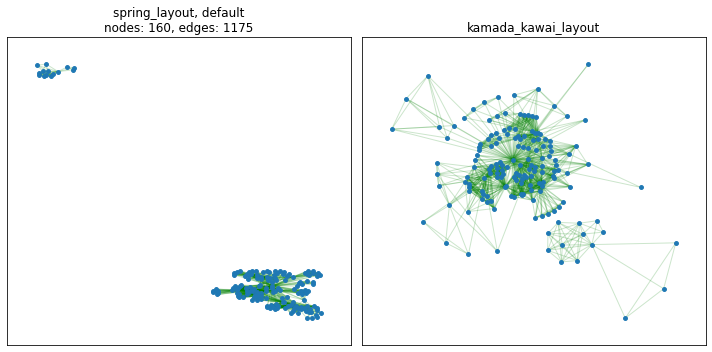

In [47]:
compare_between_layout('T32ES007267', 1)

Δ It seems that the right is much clearer, but many nodes are displayed in a weired way. In `spring_layout`, parameter `k` denotes the distance between nodes, and is set to 1/sqrt(n) by default, where *n* is the number of nodes. When a graph is composed of too many isolated components, the default `k` is less than 0.2, making nodes are tightly connceted. In such cases, just set `k>=0.2` would give an ideal result, set a larger `k` when there are more nodes.

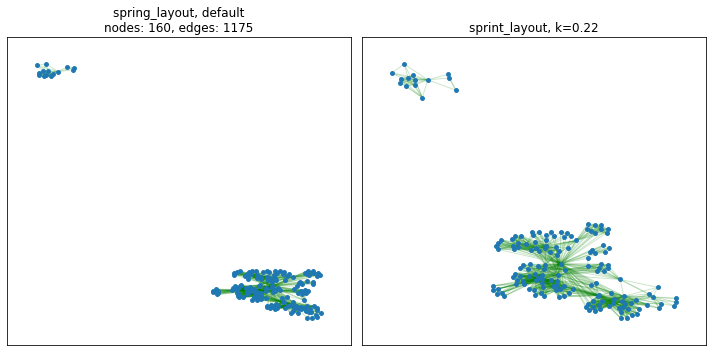

In [48]:
compare_between_layout('T32ES007267', 1, k=0.22)

Some more examples

(1)

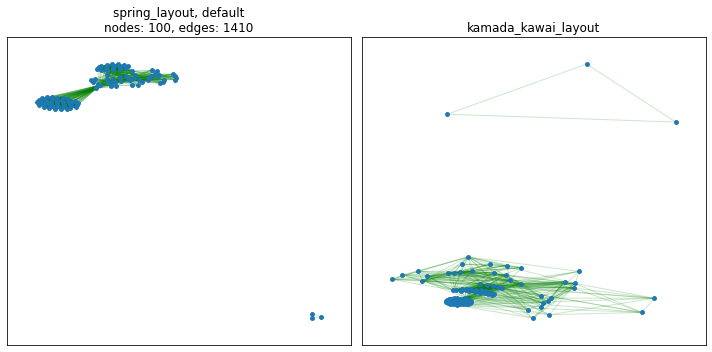

In [49]:
compare_between_layout('U01HL054485', 1)

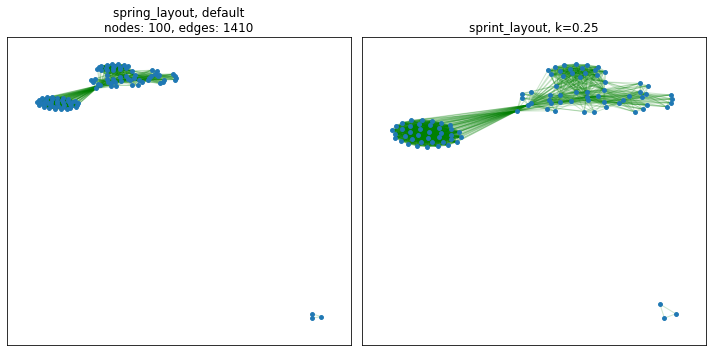

In [58]:
compare_between_layout('U01HL054485', 1, 0.25)

(2)

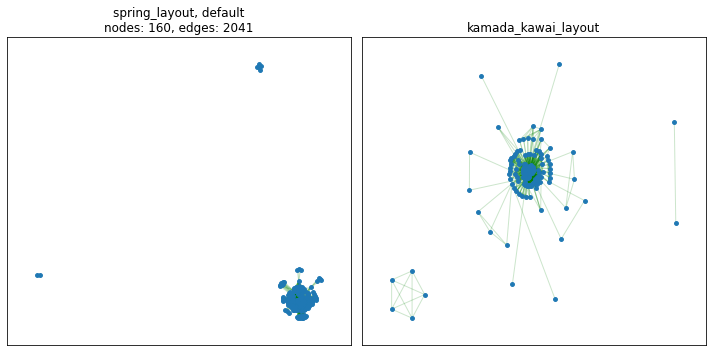

In [51]:
compare_between_layout('U01NS052220', 1)

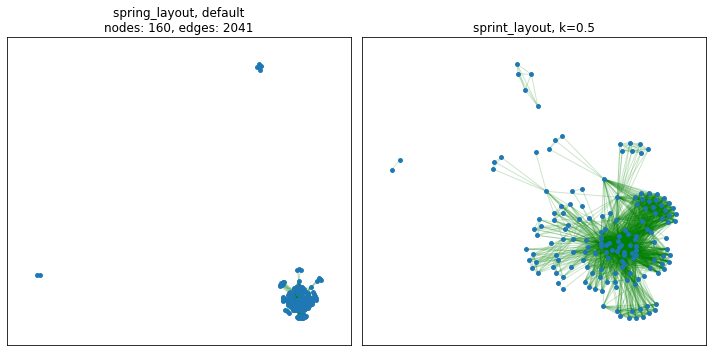

In [57]:
compare_between_layout('U01NS052220', 1, 0.5)

### Subplots

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
sub_graph = nx.read_graphml('./data/subgraphs.graphml')
pos = nx.spring_layout(sub_graph)
ns = 10 # node size
alpha = .1

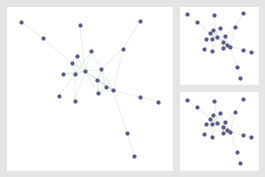

In [7]:
# set background color
fig = plt.figure(figsize=(4.5,3), facecolor='#e5e5e5')

# add unevenly distributed subplots, use grid
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.1)
ax1 = plt.subplot(grid[0:, 0:2])
ax2 = plt.subplot(grid[0, 2])
ax3 = plt.subplot(grid[1, 2])

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax1, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax1, alpha=alpha)

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax2, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax2, alpha=alpha)

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax3, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax3, alpha=alpha)

c = 'white'
# "hide" axis & set a different color for subplots
# from https://stackoverflow.com/a/7944576
for ax in fig.get_axes():
#     ax.set_facecolor('white')
#     ax.set_frame_on(False) #1
#     ax.set_axis_off() #2, use 1/2 fails to set different colors
    # the below one is the most elegant
    plt.setp(ax.spines.values(), color=c)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=c)
    
    
proj = 'subgraph_diff_colors'
plt.savefig(proj+'.png', dpi=300, bbox_inches='tight')
plt.show()

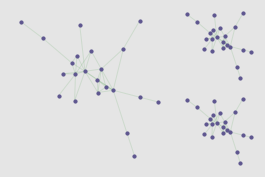

In [8]:
# set background color
fig = plt.figure(figsize=(4.5,3), facecolor='#e5e5e5')

# add unevenly distributed subplots, use grid
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.1)
ax1 = plt.subplot(grid[0:, 0:2])
ax2 = plt.subplot(grid[0, 2])
ax3 = plt.subplot(grid[1, 2])

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax1, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax1, alpha=alpha)

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax2, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax2, alpha=alpha)

nx.draw_networkx_nodes(sub_graph, pos=pos, ax=ax3, node_color='#5e568f', node_size=ns)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color='g', ax=ax3, alpha=alpha)

# hide axis
for ax in fig.get_axes():
    ax.set_axis_off()

proj = 'subgraph_same_color'
plt.savefig(proj+'.png', dpi=300, bbox_inches='tight')
plt.show()